In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('../../data/Tech-Sales & GRN data.csv')

/var/folders/gb/1cwn6rds3vv7p30s87jjmp200000gn/T/ipykernel_27408/551747085.py:10: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/Tech-Sales & GRN data.csv')


In [13]:
profile = ProfileReport(df, minimal=True)
profile.to_file("sales-grn.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
categorical_cols = ['Year','Month', 'Product', 'Category', 'Brand', 'Style No', 'Prominent Colour','Standard Size']
drop_cols = ['EAN', 'Option']
df.drop(drop_cols, axis=1, inplace=True)
df=df[df['Cost'] != 'FCR Pending']
df.GRN.fillna(0, inplace=True)
df['Opening SOH'].fillna(0, inplace=True)
df.Sale.fillna(0, inplace=True)
df['date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
df.drop(['Year', 'Month'], axis=1, inplace=True)
df.date = pd.to_datetime(df.date, format='%Y-%b')
df.sort_values(by=['date'], inplace=True)

In [3]:
df.to_csv('../../data/sales-grn.csv', index=False)
df = pd.read_csv('../../data/sales-grn.csv')

In [4]:
# this month sale depends on last (6 month weighted avg) closing inventory and last (6 month weighted avg) month rate of sale

plot_df = df.groupby(['Product', 'date']).sum()['Sale'].reset_index()
plot_df['date'] = pd.to_datetime(plot_df.date)
plot_df.sort_values(by=['date'], inplace=True)

df0 = plot_df[plot_df.Product.isin(['Shirt', 'Jeans'])]

df1 = plot_df[plot_df.Product.isin(['Chinos', 'Cargo', 'Sweat Shirt',
'Jackets (New)', 'Lounge Pants', 'Jackets(Syn)', 'Woven Shorts',
'Knitted Jogger', 'Boxers', 'T-Shirt', 'Denim Shorts'])]

df2 = plot_df[plot_df.Product.isin(['Denim Jogger', 'Blazer', 'Shorts', 'Lounge (Set)', 'Woven Jogger',
'Casual Shoes', 'Jackets(Trucker)', 'Kurta', 'Knitted Shorts',
'Pant', 'Sports Shoes', 'Co-ordinates', 'Boxers(set)',
'Formal Shoes', 'Knit Tracksuit', 'Jegging', 'Dress', 'Jackets',
'Tops', 'Trousers'])]

/var/folders/gb/1cwn6rds3vv7p30s87jjmp200000gn/T/ipykernel_27408/2837537114.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_df = df.groupby(['Product', 'date']).sum()['Sale'].reset_index()


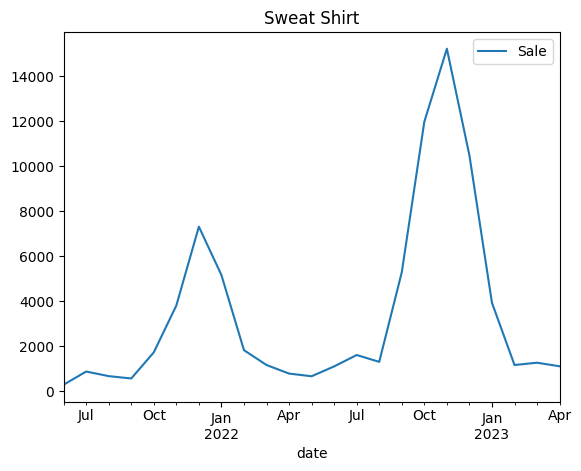

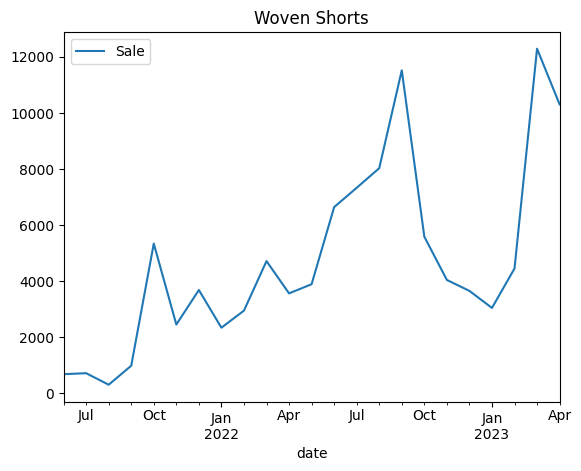

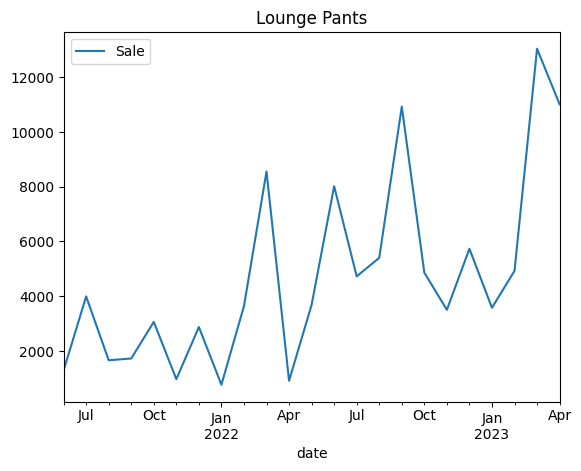

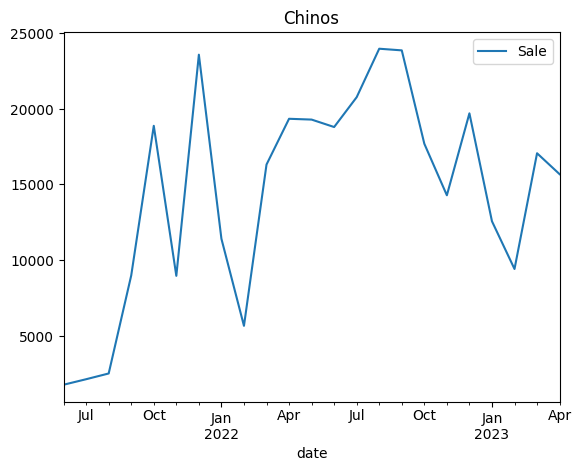

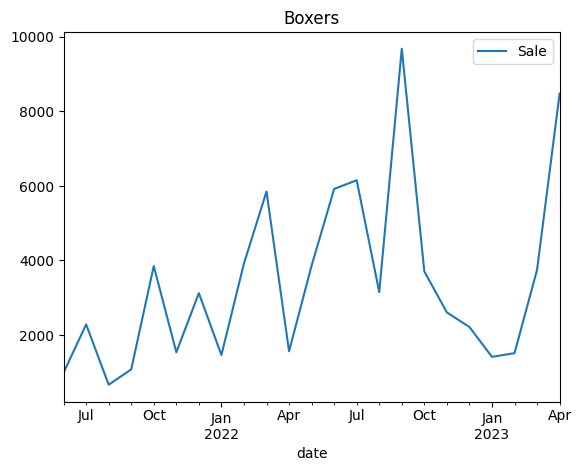

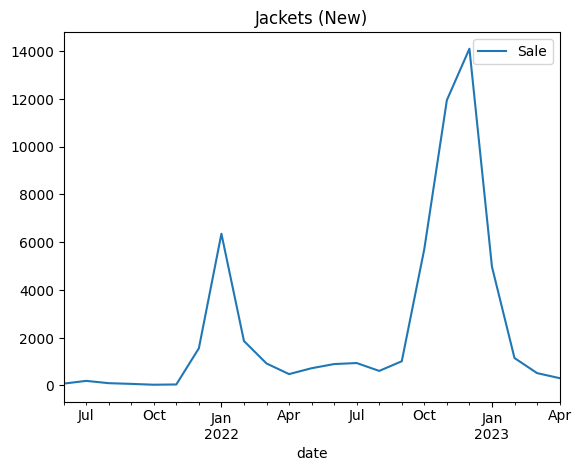

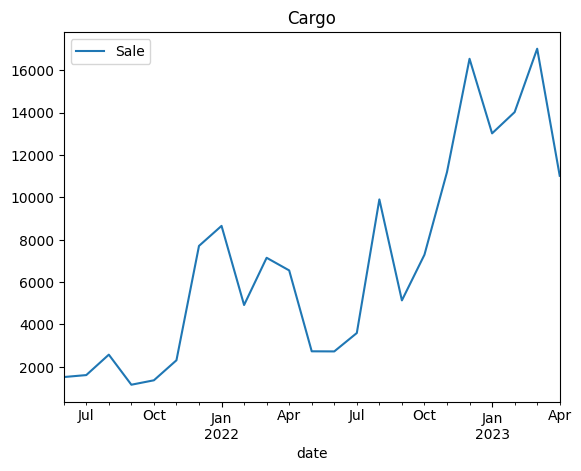

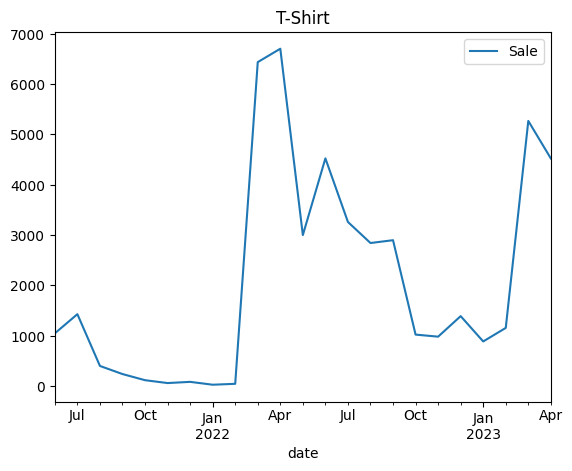

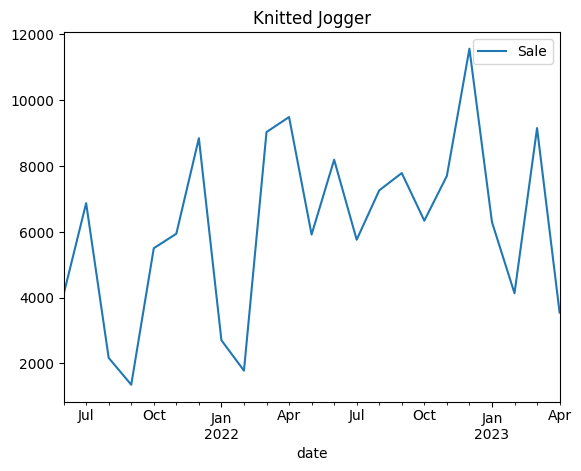

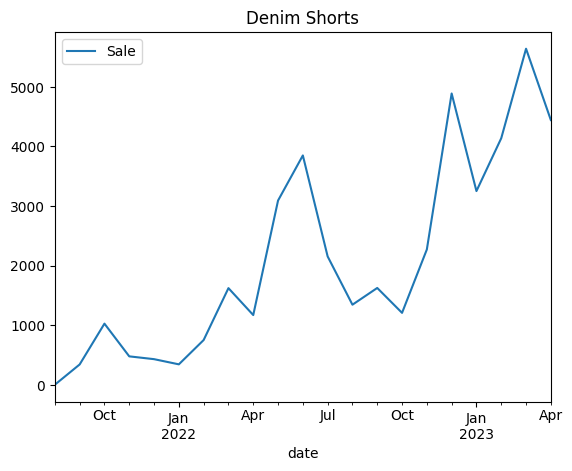

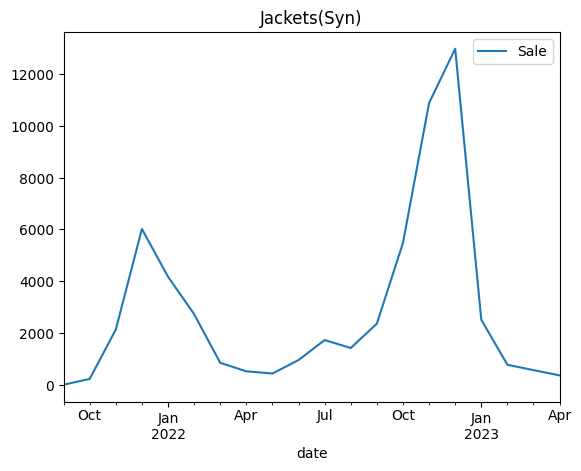

In [7]:
for i in df1.Product.unique():
    df1[df1['Product'] == i][['date', 'Sale']].plot(x='date', y='Sale', kind='line', title=i)

In [172]:
shirt_df = df[df['Product']=='Jeans']
shirt_df['product_id'] = shirt_df['Style No'].astype(str) + shirt_df['Prominent Colour'].astype(str) + shirt_df['Standard Size'].astype(str)
shirt_df = shirt_df.groupby(['product_id', 'date']).sum()['Sale'].reset_index()
# shirt_df['date'] = pd.to_datetime(shirt_df.date)
shirt_df.sort_values(by=['Sale'], inplace=True, ascending=False)
shirt_df

/var/folders/gb/1cwn6rds3vv7p30s87jjmp200000gn/T/ipykernel_18044/210159565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shirt_df['product_id'] = shirt_df['Style No'].astype(str) + shirt_df['Prominent Colour'].astype(str) + shirt_df['Standard Size'].astype(str)
/var/folders/gb/1cwn6rds3vv7p30s87jjmp200000gn/T/ipykernel_18044/210159565.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  shirt_df = shirt_df.groupby(['product_id', 'date']).sum()['Sale'].reset_index()


,product_id,date,Sale
4758,0421-DNM02-53Blue34,2022-09-01,4080.0
4424,0421-DNM02-48Blue30,2022-09-01,3883.0
4444,0421-DNM02-48Blue32,2022-09-01,2854.0
4739,0421-DNM02-53Blue32,2022-09-01,2548.0
3298,0421-CPDNM-17Blue30,2022-09-01,1787.0
...,...,...,...
10863,0622-SLSTDNM-09Blue34,2022-09-01,0.0
10870,0622-SLSTDNM-09Blue36,2022-09-01,0.0
10876,0622-SLSTDNM-09Blue38,2022-09-01,0.0
20695,1221-DNMSK-049Blue28,2022-08-01,0.0


In [175]:
shirt_df[:50]

,product_id,date,Sale
4758,0421-DNM02-53Blue34,2022-09-01,4080.0
4424,0421-DNM02-48Blue30,2022-09-01,3883.0
4444,0421-DNM02-48Blue32,2022-09-01,2854.0
4739,0421-DNM02-53Blue32,2022-09-01,2548.0
3298,0421-CPDNM-17Blue30,2022-09-01,1787.0
11303,0720-DNM-87Blue32,2023-03-01,1782.0
5063,0421-DNM02-57Blue32,2023-01-01,1512.0
11324,0720-DNM-87Blue34,2023-03-01,1501.0
5065,0421-DNM02-57Blue32,2023-03-01,1492.0
11301,0720-DNM-87Blue32,2023-01-01,1315.0
